In [71]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import statsmodels.api as sm

In [72]:
df = pd.read_csv('mock_kaggle.csv')
df = df.rename(columns={'data': 'date','venda': 'sold', 'estoque': 'stock', 'preco': 'price'})

In [73]:
df

,date,sold,stock,price
0,2014-01-01,0,4972,1.29
1,2014-01-02,70,4902,1.29
2,2014-01-03,59,4843,1.29
3,2014-01-04,93,4750,1.29
4,2014-01-05,96,4654,1.29
...,...,...,...,...
932,2016-07-27,98,3179,2.39
933,2016-07-28,108,3071,2.39
934,2016-07-29,128,4095,2.39
935,2016-07-30,270,3825,2.39


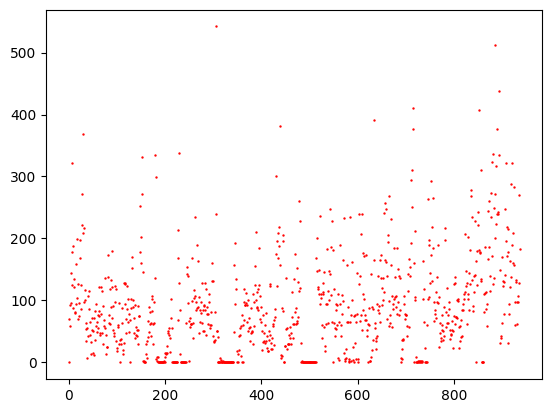

In [74]:
# df.sold.plot()

x_sold = df.index
y_sold = df.sold

plt.scatter(x_sold, y_sold, s=0.5, color='red')

лр0

In [75]:
lsm_data = []

sum_xi_x_yi = 0

id = 0
while id < len(y_sold):
    sum_xi_x_yi += x_sold[id] * y_sold[id]
    id += 1

sum_xi = sum(x_sold)
sum_yi = sum(y_sold)

sum_xi_squared = 0

for val in x_sold:
    sum_xi_squared += val ** 2

n = len(x_sold)
a = (n * sum_xi_x_yi - sum_xi*sum_yi) / (n * sum_xi_squared - sum_xi**2)
b = (sum_yi - a * sum_xi) / n

def graph(formula, x_range):  
    x = np.array(x_range)  
    y = formula(x)  # <- note now we're calling the function 'formula' with x
    
    for val in y:
        lsm_data.append(val)
    plt.plot(x, y)  


def my_formula(x):
    return a * x + b

лр1

In [76]:


endog_sold = y_sold
exog_sold = sm.add_constant(x_sold)

model_sold = sm.RecursiveLS(endog_sold, exog_sold)
res_sold = model_sold.fit()


rlsm_data =  res_sold.recursive_coefficients.filtered[0]

сравнение

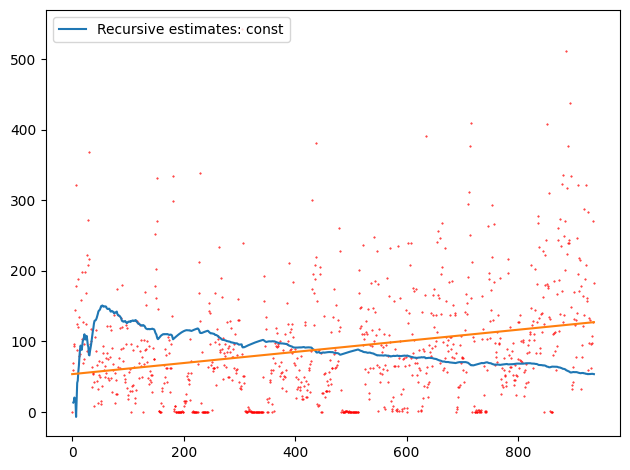

In [77]:
res_sold.plot_recursive_coefficient(alpha=None)
graph(my_formula, range(0, n))
plt.scatter(x_sold, y_sold, s=0.2, color='red')

In [78]:
def calculate_square_deviation(y_real, y_predict):
    deviation = 0
    for i in range(len(y_real)):
        dev = y_real[i] - y_predict[i]
        deviation += dev**2
    return deviation

In [79]:
square_dev_lsm = calculate_square_deviation(list(y_sold), lsm_data)
square_dev_rlsm = calculate_square_deviation(list(y_sold), rlsm_data)

linearization_funcs_data = pd.DataFrame(columns=['Linearization_func_name', 'square_deviation'])

new_data = {'Linearization_func_name': 'МНК', 'square_deviation': square_dev_lsm}
linearization_funcs_data.loc[len(linearization_funcs_data)] = new_data

new_data = {'Linearization_func_name': 'РМНК', 'square_deviation': square_dev_rlsm}
linearization_funcs_data.loc[len(linearization_funcs_data)] = new_data


linearization_funcs_data

,Linearization_func_name,square_deviation
0,МНК,5.669196e+06
1,РМНК,7.682049e+06
